# Important Points:

1. Upload this notebook to google colab and upload any audio file in the file section. You can drag and drop the audio file(I have provided two: wavrecording.wav and test.wav). I have hardcoded wavrecording.wav in this notebook.

In [ ]:
!pip install hmmlearn
!pip install eyed3

In [ ]:
pip install pyAudioAnalysis

In [ ]:
pip install eyed3

In [ ]:
pip install pydub

In [ ]:
pip install SpeechRecognition

In [ ]:
pip install transcribe

In [ ]:
pip install moviepy

In [ ]:
pip install pyAudioAnalysis

In [ ]:
import os

In [ ]:
import pyAudioAnalysis as paa

In [ ]:
from pyAudioAnalysis import audioSegmentation

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(26, 7 - 1) = 6 components.

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).



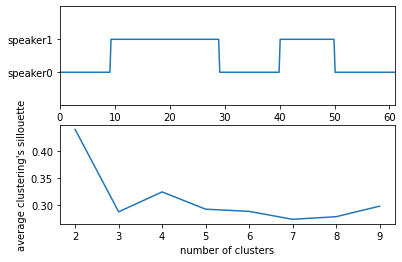

In [ ]:
result = audioSegmentation.speaker_diarization(filename = "/content/wavrecording.wav", plot_res = True, n_speakers = -1, mid_window=2.0, mid_step=0.2, 
                             short_window=0.05, lda_dim=35)

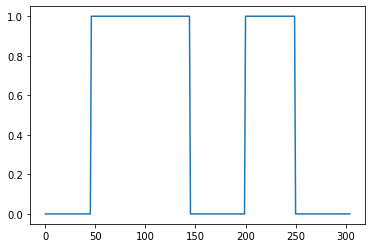

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result)

In [ ]:
len(result)

305

In [ ]:
from itertools import groupby
sep_list = [list(j) for i, j in groupby(result)]

In [ ]:
import numpy as np

In [ ]:
np.array(sep_list)

array([list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]),
       list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [ ]:
time_list = []
for list_ in sep_list:
  values = list_[:int(len(list_)/5)]
  for e in values:
    time_list.append(int(e))


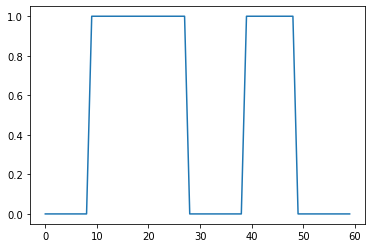

In [ ]:
plt.plot(time_list)

In [ ]:
pip install soundfile

In [ ]:
pip install --upgrade azure-cognitiveservices-speech

Requirement already up-to-date: azure-cognitiveservices-speech in /usr/local/lib/python3.6/dist-packages (1.13.0)


In [ ]:
import azure.cognitiveservices.speech as speechsdk
def speech_text(audio_filename):
    speech_key, service_region = "54fe015847d94db9a85672137c590286", "eastasia"
    speech_config = speechsdk.SpeechConfig(subscription=speech_key, region=service_region)
    audio_input = speechsdk.audio.AudioConfig(filename=audio_filename)

    speech_recognizer = speechsdk.SpeechRecognizer(speech_config=speech_config, audio_config=audio_input)

    result = speech_recognizer.recognize_once()
    if result.reason == speechsdk.ResultReason.RecognizedSpeech:
        return result.text
    elif result.reason == speechsdk.ResultReason.NoMatch:
        return ""
    elif result.reason == speechsdk.ResultReason.Canceled:
        cancellation_details = result.cancellation_details
        return ""

In [ ]:
import os 
from pydub import AudioSegment
from pydub.silence import split_on_silence
import soundfile as sf
import speech_recognition as sr
r = sr.Recognizer()
# a function that splits the audio file into chunks
# and applies speech recognition
def get_large_audio_transcription(path):
    """
    Splitting the large audio file into chunks
    and apply speech recognition on each of these chunks
    """
    # open the audio file using pydub
    sound = AudioSegment.from_wav(path)  
    # split audio sound where silence is 700 miliseconds or more and get chunks
    chunks = split_on_silence(sound,
        # experiment with this value for your target audio file
        min_silence_len = 200,
        # adjust this per requirement
        silence_thresh = sound.dBFS-14,
        # keep the silence for 1 second, adjustable as well
        keep_silence=500,
    )
    folder_name = "audio-chunks"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
    whole_text = ""
    # process each chunk 
    total_speech_len = 0
    for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        
        f = sf.SoundFile(chunk_filename)
        
        chunk_len = (len(f) / f.samplerate)
        try:
          # current_speaker = max(time_list[int(total_speech_len + 1): int(total_speech_len + 1)+int((chunk_len) + 2)])
          current_speaker = time_list[int(total_speech_len + chunk_len/2)]

        except:
          current_speaker = time_list[-1]
          
        total_speech_len += chunk_len
        # recognize the chunk
        # with sr.AudioFile(chunk_filename) as source:
        #     audio_listened = r.record(source)
        #     # try converting it to text
        #     try:
        #         text = r.recognize_google(audio_listened)
        #         full_text.append(text)
        #         text = f"Speaker{current_speaker}: {[str(end.time())]} " + text
        #         print(text)
        #     except sr.UnknownValueError as e:
        #         pass
        #     else:
        #         text = f"{text.capitalize()}. "
        #         whole_text += text 
        text = speech_text(chunk_filename)
        if len(text) == 0:
            continue
        text = f"Speaker{current_speaker}: " + text
        print(text)
        whole_text += text
        os.remove(chunk_filename) 
    # return the text for all chunks detected
    os.rmdir(folder_name)
    return whole_text

In [ ]:
chunk = get_large_audio_transcription("/content/wavrecording.wav")

Speaker0: I won't have.
Speaker0: A negative effect on economic growth.
Speaker0: In fact.
Speaker0: Most of the mainstream modeling shows that our economy will continue to grow.
Speaker1: But if you have firms that have to be shifting in making the transition to having lower carbon emissions, that may mean that they have less money to spend on other forms of investment. It may mean they have lower profits, so therefore they have less money to deliver in the form of company tax into government coffers.
Speaker1: Those things could have a spin off.
Speaker0: Impact onto the GDP numbers.
Speaker0: The problem of what you're saying.
Speaker0: Is that you assume that there's no cost to doing nothing.
Speaker0: And there is.
Speaker0: That's why Australians want real change at this election.
Speaker1: Basic of doing nothing. I don't assume that there's no cost to doing nothing. I accept your position that there's a long term benefit. What I'm asking you to do is just square with the voters 

In [ ]:
chunk

"Speaker0: So Aaron.Speaker0: In your email, you said you wanted to talk about the exam.Speaker0: Yeah.Speaker0: Um?Speaker0: I've just never taken a class with so many different readings.Speaker1: I've managed to keep up with all the assignments.Speaker0: But I'm not sure how to.Speaker0: How to?Speaker0: How to review everything?Speaker0: Yeah.Speaker1: In other classes I've had.Speaker1: There's usually just one book to review, not.Speaker1: Three different books plus all those other text Excerts and videos."